###### First we'll import all the basic libraries like numpy for numeric python,pandas for data manipulation and matplotlib and seaborn  for data visualization

In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### Will import the csv file directly from the url to read the dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


###### In this dataframe first column was unnamed so i simply name it as S.N.

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv',header=0,names=['S.N.','TV','Radio','Newspaper','Sales'])
df

,S.N.,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Now we have got our final data frame.This data frame is consist of 200 rows and 5 columns and all of these columns are having float data type except the S.N. which is in Integer form.
As we have to predict the total sales generated from all the sales channel(i.e. from TV,Radio & Newspaper) and the sales figure are in float format hence will use regression model to predict the same.

### EDA Process

In [11]:
print('Rows=',df.shape[0])
print('Columns=',df.shape[1])
print('shape=',df.shape)

Rows= 200
Columns= 5
shape= (200, 5)


In [15]:
df.ndim

2

This shows our data is two dimensional

In [16]:
df.size

1000

Total number of values in the dataset is 1000

In [12]:
df.head()

,S.N.,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


It's represent top 5 rows of the dataset

In [13]:
df.tail()

,S.N.,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


It's represent bottom 5 rows of the dataset

In [14]:
df.sample()

,S.N.,TV,Radio,Newspaper,Sales
59,60,210.7,29.5,9.3,18.4


It's represent any one random row of the dataset

In [26]:
df.dtypes

S.N.           int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

All the attributes of the dataframe represent float data type except S.N. which is integer

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.N.       200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


This gives us the brief information about all the attributes like their data types, null value count,memory usage on storing the all.
Hence we can say that there are no categorical attributes are present in the data frame and also there is no nan value present too & memory usage for storing it is 7.9 KB

In [18]:
df.isnull()

,S.N.,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


Above is the Boolean representaion of the null value corresponding to all the entries and it indiactes that there is no null value present in the data frame.

In [19]:
df.isnull().any()

S.N.         False
TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

Above is the Boolean representaion of the null values w.r.t. each attributes and it indiactes that there is no null value present in the data frame.

In [20]:
df.isnull().any().any()

False

The sum of all boolean indices is False and it indiactes that there is no null value present in the data frame.

In [21]:
df.isnull().sum()

S.N.         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Above is the count of the null values w.r.t. each attributes and it indiactes that there is no null value present in the data frame.

In [22]:
df.isnull().sum().sum()

0

The sum of all null indices is 0 and it indiactes that there is no null value present in the data frame.

In [27]:
df.Sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

This shows that this is the problem of Regression as target variable is having continuous data type and doesn't form a category,ergo will use the Regression model for the prediction

In [28]:
df['Sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

Target variable column doesn't form a category,ergo will use the Regression model for the prediction

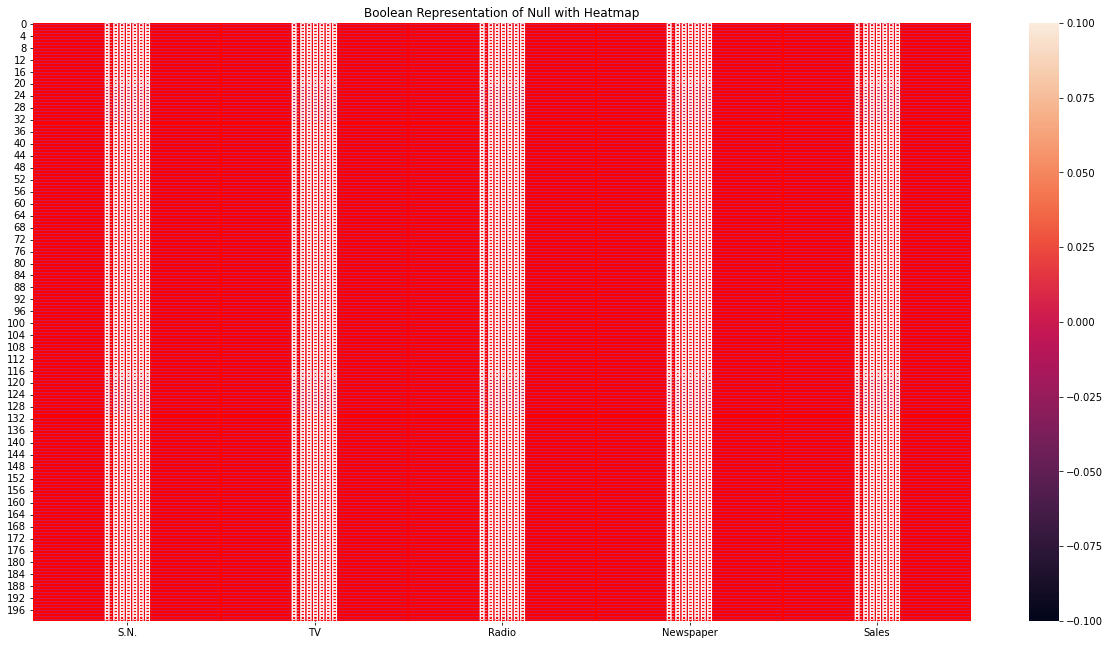

In [33]:
plt.figure(figsize=(21,11))
sns.heatmap(df.isnull(),annot=True,fmt='2f',linecolor='r',linewidth='0.2')
plt.title('Boolean Representation of Null with Heatmap')
plt.savefig('null.png')

This is the heatmap representation of null values and it's clearly shows us that all the columns are filled with some value and not null

### Data Visualization

##### 1.Numerical Ploting

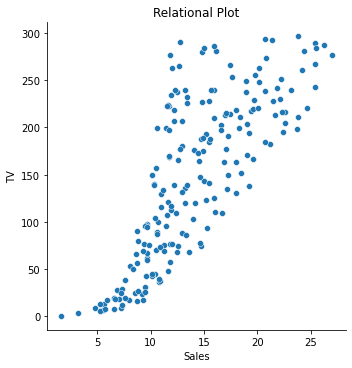

In [53]:
sns.relplot(df.Sales,df.TV)
plt.title('Relational Plot')
plt.show()

By seeing the above plot we can clearly say that there is a strong positive correlation b/w Sales and TV i.e. Sales is increasing as we increase the pattern for TV 

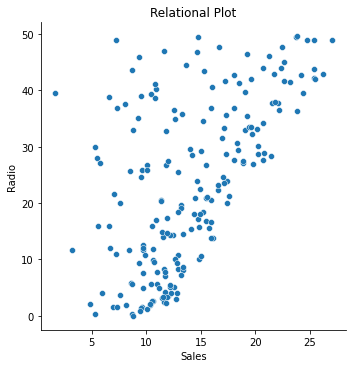

In [38]:
sns.relplot(df.Sales,df.Radio)
plt.title('Relational Plot')
plt.show()

By seeing the above plot we can clearly say that there is a positive correlation b/w Sales and Radio i.e. Sales is increasing as we increase the pattern for Radio 

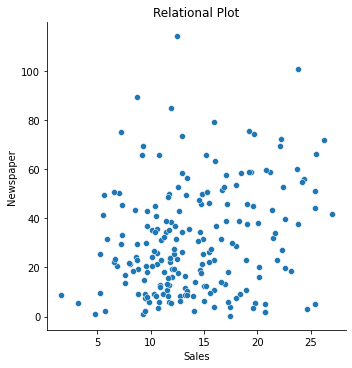

In [39]:
sns.relplot(df.Sales,df.Newspaper)
plt.title('Relational Plot')
plt.show()

By seeing the above plot we can clearly say that there is no such patterns are coming, hence no possible relation can be made b/w the attributes

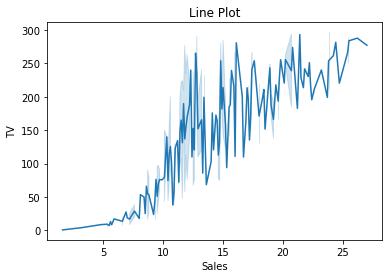

In [54]:
sns.lineplot(df.Sales,df.TV)
plt.title('Line Plot')
plt.show()

By seeing the above plot we can clearly say that there is a strong positive increasing trend b/w Sales and TV i.e. Sales is increasing as we increase the pattern for TV 

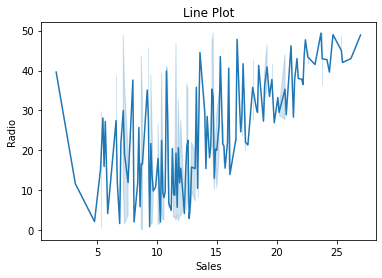

In [40]:
sns.lineplot(df.Sales,df.Radio)
plt.title('Line Plot')
plt.show()

By seeing the above plot we can clearly say that there is a positive increasing trend b/w Sales and Radio i.e. Sales is increasing as we increase the pattern for Radio 

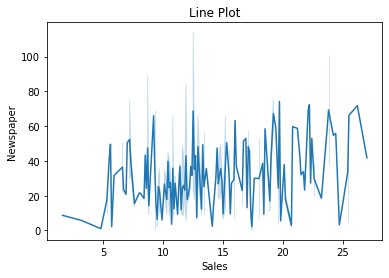

In [41]:
sns.lineplot(df.Sales,df.Newspaper)
plt.title('Line Plot')
plt.show()

By seeing the above plot we can clearly say that there is no such pattern is being made hence we can say that Newspaper will not make that much impact on sales as compare to that of TV and Radio

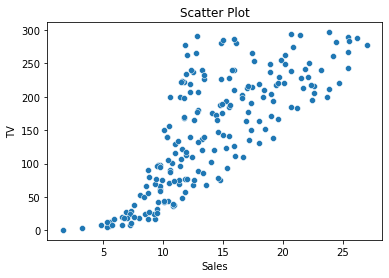

In [55]:
sns.scatterplot(df.Sales,df.TV)
plt.title('Scatter Plot')
plt.show()

By seeing the above plot we can clearly say that there is a strong positive correlation b/w Sales and TV i.e. Sales is increasing as we increase the pattern for TV 

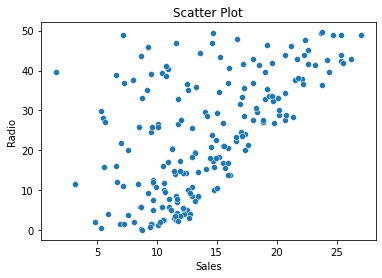

In [42]:
sns.scatterplot(df.Sales,df.Radio)
plt.title('Scatter Plot')
plt.show()

By seeing the above plot we can clearly say that there is a positive correlation b/w Sales and Radio i.e. Sales is increasing as we increase the pattern for Radio 

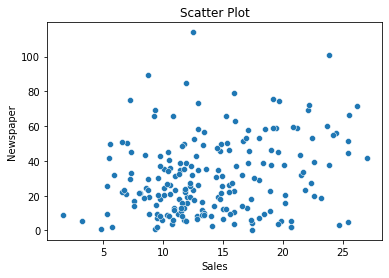

In [43]:
sns.scatterplot(df.Sales,df.Newspaper)
plt.title('Scatter Plot')
plt.show()

By seeing the above plot we can clearly say that there is no such patterns are coming i.e. clustering is present everywhere in the above plot, hence no possible relation can be made b/w the attributes

##### 2.Distribution plot

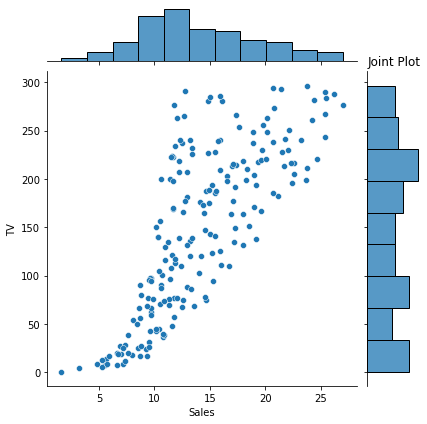

In [56]:
sns.jointplot(df.Sales,df.TV)
plt.title('Joint Plot')
plt.show()

We are getting strong positive correlation

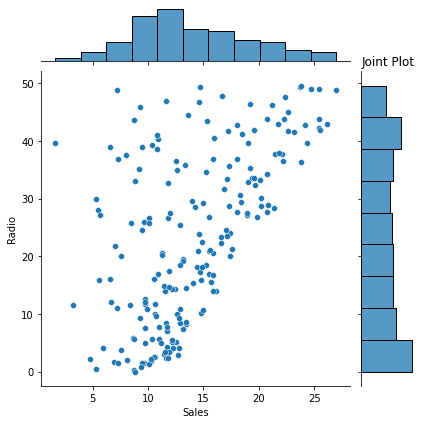

In [45]:
sns.jointplot(df.Sales,df.Radio)
plt.title('Joint Plot')
plt.show()

we are getting positive correlation but the impact of sales would definetly going to be less as compare that of TV.

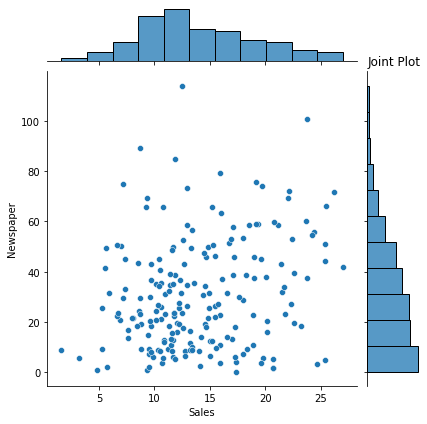

In [44]:
sns.jointplot(df.Sales,df.Newspaper)
plt.title('Joint Plot')
plt.show()

The sales distribution of Newspaper would be lesser as compare to other channels distribution

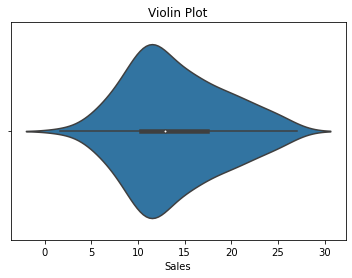

In [46]:
sns.violinplot(df.Sales)
plt.title('Violin Plot')
plt.show()

The frequency of the maximum Sales falls under the range 10-15.

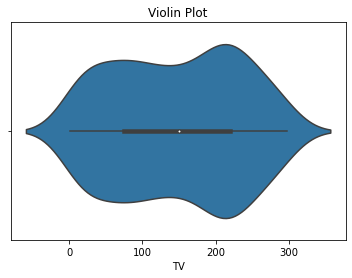

In [57]:
sns.violinplot(df.TV)
plt.title('Violin Plot')
plt.show()

The frequency for the distribution of TV falls under the range around 90-210.

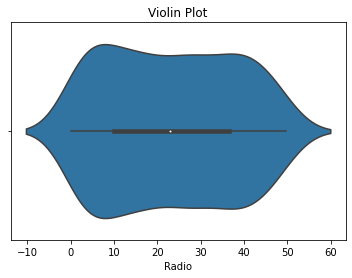

In [47]:
sns.violinplot(df.Radio)
plt.title('Violin Plot')
plt.show()

The frequency for the distribution of Radio falls under the range around 9-40.

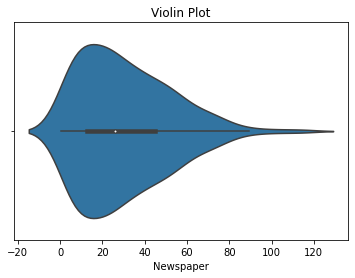

In [48]:
sns.violinplot(df.Newspaper)
plt.title('Violin Plot')
plt.show()

The frequency for the distribution of Newspaper falls under the range around 10-20.which indiactes that clustering is being made at only one loaction thats why we are not getting any specific trend that indicats highest correlation

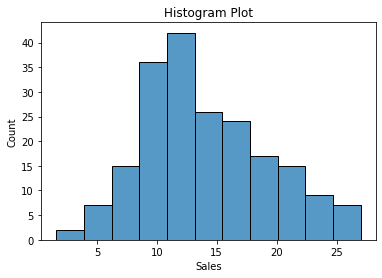

In [49]:
sns.histplot(df.Sales)
plt.title('Histogram Plot')
plt.show()

It shows that,15 sales are happening more than 40 times with the help of TV ,Radio or Newspaper together or individually 

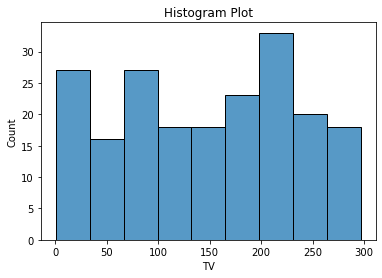

In [58]:
sns.histplot(df.TV)
plt.title('Histogram Plot')
plt.show()

It shows that,210 units of TV have approx 34 sales

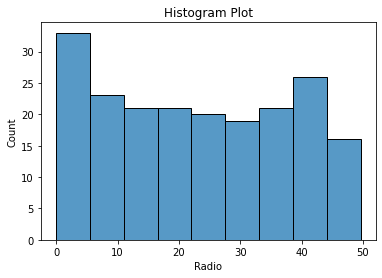

In [50]:
sns.histplot(df.Radio)
plt.title('Histogram Plot')
plt.show()

It shows that,0-5 units of Radio have approx 34 Sales

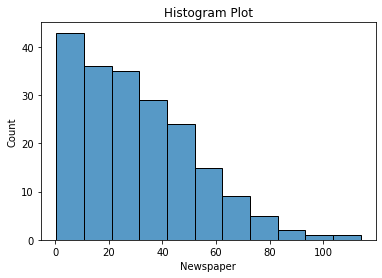

In [51]:
sns.histplot(df.Newspaper)
plt.title('Histogram Plot')
plt.show()

It shows that,0-10 units of Newspaper have approx 44 Sales

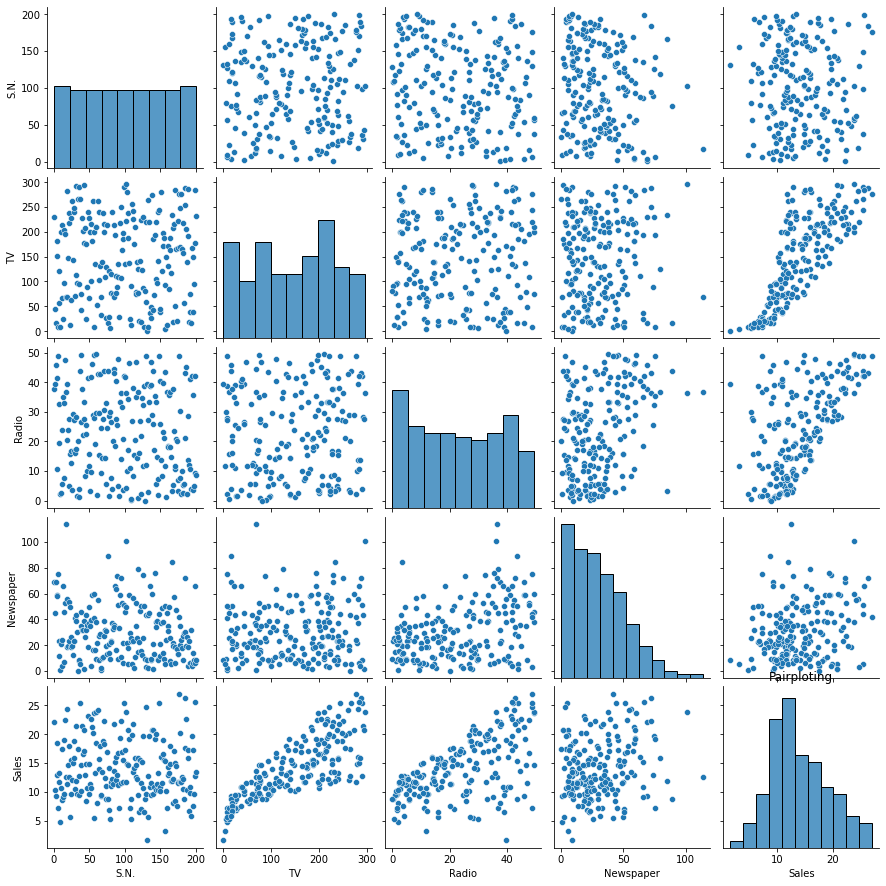

In [61]:
sns.pairplot(df)
plt.title('Pairploting')
plt.savefig('pairplot.png')
plt.show()

#### By visualizing the above all the plots we can say that there is a strong positive correlation b/w Sales and TV(i.e. when Sales increases TV units increases too and vice-versa)and there is a decent positive correlation b/w Sales and Radio as well but the impact of sales would be less as comapre to TV and sales would be too less in case of channel Medium Newspaper where the correlation b/w the sales and Newspaper is very less as compare to all other channel medium.

### Descriptive Statistics

In [52]:
df.describe()

,S.N.,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Here I've transposed the data frame to do the analysis more better

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.N.,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Since Sales is the target variable and S.N. wouldn't going to impact any attribute hence will do the analysis on the remaining features.
As we can see that mean of each attributes is less as compare to median of the respective attributes except variable TV hence there can be the possibility that outliers may be present.
Also, in the Newspaper column the difference b/w the max value and the 3rd interquartile(IQR) is too big as compare to that of min value and 1st IQR and 1stIQR and 2nd IQR hence skewness might also come into the picture later

##### Heatmap Representation of Descriptive Statistics

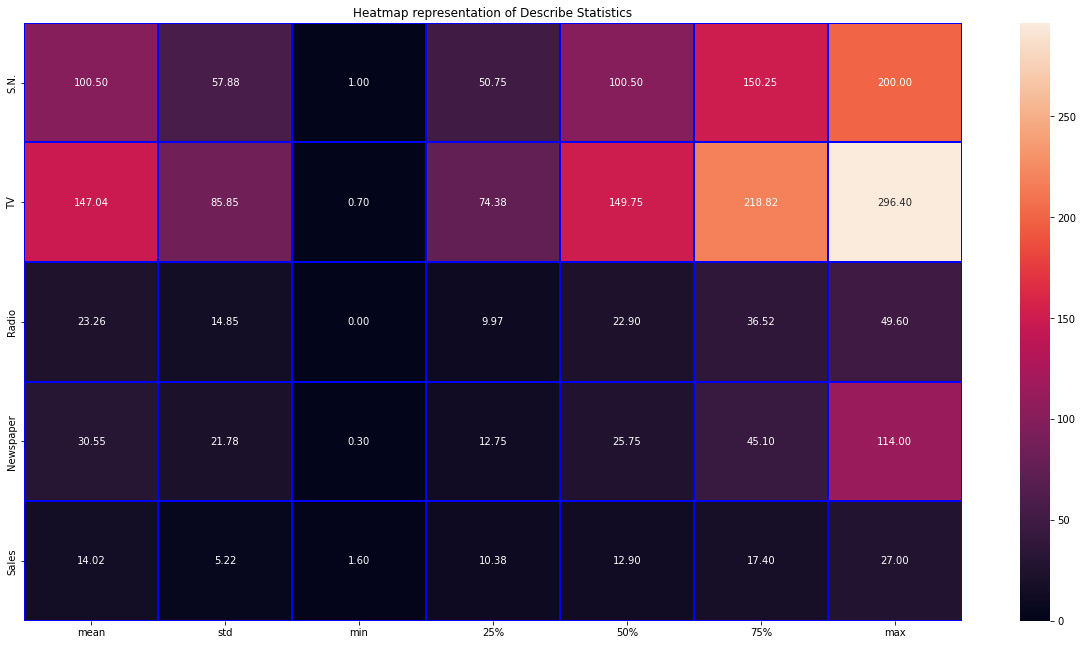

In [71]:
plt.figure(figsize=(21,11))
sns.heatmap(df.describe()[1:].T,annot=True,linewidth=0.3,linecolor='blue',fmt='0.2f')
plt.title('Heatmap representation of Describe Statistics')
plt.savefig('desc.png')
plt.show()

### Correlation

In [72]:
df.corr()

,S.N.,TV,Radio,Newspaper,Sales
S.N.,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Will try to remove all the negative correlative columns w.r.t. Sales

In [73]:
df.corr().Sales.sort_values()

S.N.        -0.051616
Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

As we can see that only the S.N. column is negative correlative w.r.t. our target variable hence will drop it later on the data cleansing part but first will try to check multicollinearity too.
This indiactes that Column TV is more correlative after then its Radio and in the last its Newspaper, w.r.t. Target variable Sales(positive correlation-TV>Radio>Newspaper).

##### Heatmap Representation of Correlation

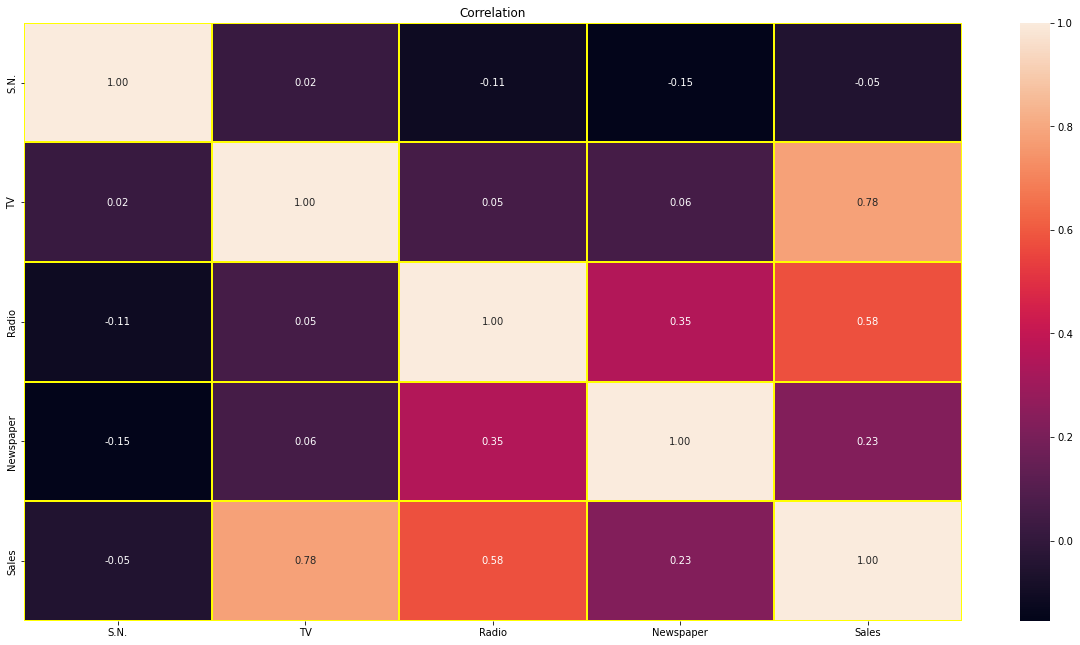

In [74]:
plt.figure(figsize=(21,11))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='yellow',fmt='0.2f')
plt.title('Correlation')
plt.savefig('Corr.png')
plt.show()

### Multicollinearity

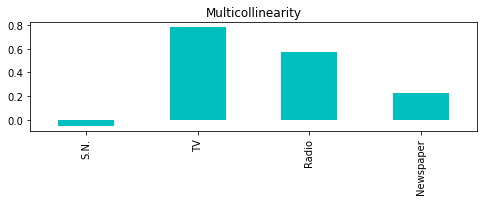

In [79]:
plt.figure(figsize=(8,2))
df.corr()['Sales'].drop(['Sales']).plot(kind='bar',color='c')
plt.title('Multicollinearity')
plt.savefig('multicol.png')
plt.show()

Will check the possibility of multicollinearity in the next part while removing the correlation and if it exist will remove it after removing the negative correlated variables

### Skewness

In [80]:
df.skew()

S.N.         0.000000
TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [81]:
df.skew().sort_values()

TV          -0.069853
S.N.         0.000000
Radio        0.094175
Sales        0.407571
Newspaper    0.894720
dtype: float64

Let's assume the Threshold value for skewness is +/-0.5. As we can see that only Newspaper column has more skewness as compare to other(we will not apply the threshold value onto the Target variable i.e., Sales).Since Newspaper has skewness 0.9 hence it will get skewed to right hand side only.Hence, will remove the skewness later on once will reach to the data cleansing model.

##### Distribution Ploting to check the Normal Distribution

<Figure size 864x576 with 0 Axes>

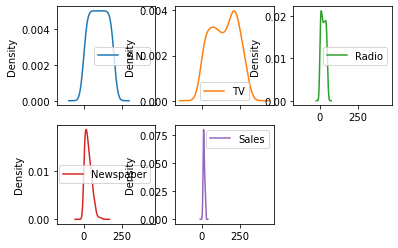

In [88]:
plt.figure(figsize=(12,8))
df.plot(kind='kde',subplots=True,layout=(2,3))
plt.savefig('Dst.png')
plt.title('Distribution Plot')
plt.show()

In the above bivariate visualization we can see that not a single variable is equally distributed along the axis i.e. it's getting skewed to the either sides of the curve and we're not getting the ideal condition of Normally distributed curve where the mean is equal to zero and standard deviation is at 1.Hence will remove the skewness in the next part of Data Cleansing and make it transform to standard form so that ideal condition could be met.We can also plot it individually as shown in the below figures.

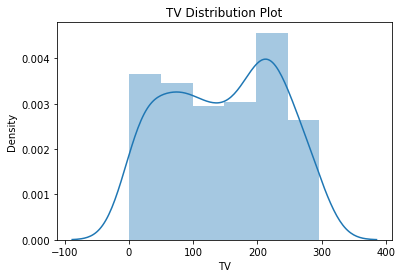

In [92]:
sns.distplot(df.TV)
plt.title('TV Distribution Plot')
plt.show()

skewed to the left hand side

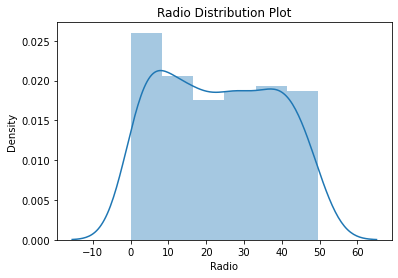

In [93]:
sns.distplot(df.Radio)
plt.title('Radio Distribution Plot')
plt.show()

skewed to the right hand side

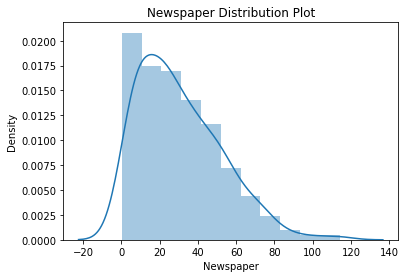

In [94]:
sns.distplot(df.Newspaper)
plt.title('Newspaper Distribution Plot')
plt.show()

skewed to the right hand side

### Outliers

In [95]:
z=np.abs(zscore(df))
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

It's shows only 2 rows and 2 columns are having outliers

In [96]:
z.iloc[16]

S.N.         1.446281
TV           0.925305
Radio        0.900494
Newspaper    3.841171
Sales        0.292541
Name: 16, dtype: float64

In [97]:
z.iloc[16][3]

3.8411707150992718

In [98]:
z.iloc[101,3]

3.238153957342154

##### Bivariate Visualization with Boxplot

<Figure size 792x576 with 0 Axes>

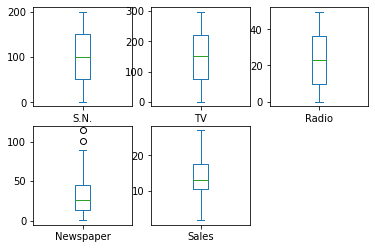

In [5]:
plt.figure(figsize=(11,8))
df.plot(kind='box',subplots=True,layout=(2,3))
plt.title('Boxplot')
plt.savefig('box.png')
plt.show()

It shows that Newspaper column can have outliers,so will check it and remove incase it is present.

### Data Cleaning

##### Removing Negative Correlative Columns

In [103]:
df1=df.drop('S.N.',axis=1)
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Though,We have lost one column in the process

##### Checking Negative Multicollinearity

In [108]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
#Features
x=df1.drop('Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [106]:
#Target
y=df1['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [112]:
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    print(df2)

In [113]:
vif()

    Features       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


This shows that there are two columns-Radio & Newspaper which are giving almost similar information to the target variable and since Newspaper are less correlative, w.r.t. Target variable, as comapre to Radio column hence will drop the Newspaper column from the dataset and remove the multicollinearity

In [114]:
df2=df1.drop('Newspaper',axis=1)
df2

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


Now we have lost one more column in this process & we have with only 3 columns and 200 rows.

### Removing Outliers

In [115]:
df3=df2[(z<3).all(axis=1)]
df3

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


only 2 rows has been lost in this process

In [129]:
percentage_loss=(200-198)*100/200
percentage_loss

1.0

As the percentage loss is only 1% & which is still very less than 10% of our threshold value hence we can say that we are moving in the right direction on building our model and doing prediction as almost all the data has been maintained till now.

### Removing Skewness

In [116]:
import sklearn
from sklearn.preprocessing import power_transform

In [117]:
#Features
x=df3.drop('Sales',axis=1)
x

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [133]:
#Target variable
y=df3['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

In [119]:
x=power_transform(x)
x

array([[ 0.95598306,  0.9691098 ],
       [-1.19200349,  1.04623436],
       [-1.6461253 ,  1.37296802],
       [ 0.14293428,  1.1473316 ],
       [ 0.45645241, -0.73502642],
       [-1.8204008 ,  1.51543955],
       [-1.00349358,  0.70309642],
       [-0.20996049, -0.0876566 ],
       [-1.82264543, -1.62948287],
       [ 0.652694  , -1.56152179],
       [-0.88482761, -1.19258569],
       [ 0.80322028,  0.19357553],
       [-1.52567125,  0.82725998],
       [-0.48090308, -1.01613619],
       [ 0.69642374,  0.70856268],
       [ 0.60769456,  1.45886692],
       [ 1.44702338,  1.06152278],
       [-0.84304109, -0.02834315],
       [ 0.09676151,  0.18741189],
       [ 0.84017479,  0.41523303],
       [ 1.02746612, -1.2660875 ],
       [-1.72466475, -0.3430802 ],
       [ 0.93826742, -0.27204438],
       [-0.93674187, -0.59023588],
       [ 1.27285397, -1.44792482],
       [ 0.04802388,  0.50756488],
       [ 1.05376032, -0.28612399],
       [ 1.13797152,  0.38008881],
       [-0.82432769,

Now the skewness has been removed with the help of power_transform method and in the next line we'll transform it into standard form to attain its ideal condition of normal distribution where mean would be at 0 and std would be at 1.

In [121]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [122]:
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ],
       [-1.19200349,  1.04623436],
       [-1.6461253 ,  1.37296802],
       [ 0.14293428,  1.1473316 ],
       [ 0.45645241, -0.73502642],
       [-1.8204008 ,  1.51543955],
       [-1.00349358,  0.70309642],
       [-0.20996049, -0.0876566 ],
       [-1.82264543, -1.62948287],
       [ 0.652694  , -1.56152179],
       [-0.88482761, -1.19258569],
       [ 0.80322028,  0.19357553],
       [-1.52567125,  0.82725998],
       [-0.48090308, -1.01613619],
       [ 0.69642374,  0.70856268],
       [ 0.60769456,  1.45886692],
       [ 1.44702338,  1.06152278],
       [-0.84304109, -0.02834315],
       [ 0.09676151,  0.18741189],
       [ 0.84017479,  0.41523303],
       [ 1.02746612, -1.2660875 ],
       [-1.72466475, -0.3430802 ],
       [ 0.93826742, -0.27204438],
       [-0.93674187, -0.59023588],
       [ 1.27285397, -1.44792482],
       [ 0.04802388,  0.50756488],
       [ 1.05376032, -0.28612399],
       [ 1.13797152,  0.38008881],
       [-0.82432769,

In [123]:
print(x.mean())
print(x.std())

3.364312195833808e-17
1.0


Since,We are getting mean as almost zero and std as 1, which shows that our feature variables has transformed into the standard form where the normal distribution condition is now applicable.

### Training and testing phase

In [137]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()

In [142]:
#will finding best value of random_state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print('\n')
        

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.8864429005851516
Testing Accuracy is 0.8969038187734771


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.8959315272395362
Testing Accuracy is 0.9023478975134571


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.906194366349963
Testing Accuracy is 0.8644995488128195


At Random_State 3 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.8983402899078188
Testing Accuracy is 0.8638348544116703


At Random_State 4 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.897428667899803
Testing Accuracy is 0.8912877258153321


At Random_State 5 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.8905723980808218
Testing Accuracy is 0.8929123825339387


At Random_State 6 the training accuracy an

Since,at random_state 90 my model training and testing accuracy is same,hence will selecting random_state as 90 for the Linear Regression model

In [143]:
#Traing the Linear Regression Model at Random_State 90
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)
print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')

Training Accuracy is 0.876005856302284
Testing Accuracy is 0.9309543061141395


This shows that testing accuarcy of the linear regression model (93%) is more as comapre to training accuracy (87%) hence there is possibility of low bias and high variance in the model so will try to apply Regularization technique to find out the optimal condition where the bias and variance both would be minimum.Hence will move ahead and find out Cross Validation Score to compare it with testing accuracy.

##### Best Fitted Line for Linear Regression Model

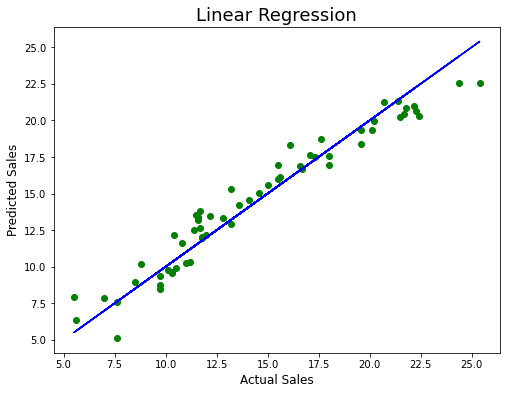

In [149]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,test_pred,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=12)
plt.ylabel('Predicted Sales',fontsize=12)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

As we can see that this line covers most of the data points onto it hence we can say that our model accuracy is excellent instead of biasness and variance presence in the model

### Cross Validation Score

In [152]:
from sklearn.model_selection import cross_val_score

In [154]:
for j in range(2,10):
    cvs=cross_val_score(lr,x,y,cv=j)
    cvs.mean()
    cvs.std()
    print(f'At K-Fold {j} the CV Score is {cvs.mean()} & std is {cvs.std()}')
    print('\n')

At K-Fold 2 the CV Score is 0.902723348074848 & std is 0.012368944967964146


At K-Fold 3 the CV Score is 0.8982271938497316 & std is 0.021032305935082634


At K-Fold 4 the CV Score is 0.8995718735894775 & std is 0.01854610202511321


At K-Fold 5 the CV Score is 0.8965102445070332 & std is 0.01967687895958662


At K-Fold 6 the CV Score is 0.8991704476651128 & std is 0.026702659312300335


At K-Fold 7 the CV Score is 0.895599867522712 & std is 0.022955845311130825


At K-Fold 8 the CV Score is 0.8988254177083785 & std is 0.019920209682058636


At K-Fold 9 the CV Score is 0.8946086798760925 & std is 0.03693398444133245




I have selected K-Fold cv method and divided the rows frequency in to the combination of 10 instances. At cv=2 linear regression model testing accuracy is 93% and cv score is 90% which is still close and good accuracy and somehow we have got the optimal condition of low bias and variance 

##### Now will move forward and check the CV Score for all other models as well

In [162]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [177]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,10):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()} & std is {cvs.std()}')
        print('\n')

In [184]:
#1st model
model(lr,x,y)

Training Accuracy of model LinearRegression() is 0.876005856302284
Testing Accuracy of model LinearRegression() is 0.9309543061141395


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is 0.902723348074848 & std is 0.012368944967964146


At K-Fold 3 the CV Score of model LinearRegression() is 0.8982271938497316 & std is 0.021032305935082634


At K-Fold 4 the CV Score of model LinearRegression() is 0.8995718735894775 & std is 0.01854610202511321


At K-Fold 5 the CV Score of model LinearRegression() is 0.8965102445070332 & std is 0.01967687895958662


At K-Fold 6 the CV Score of model LinearRegression() is 0.8991704476651128 & std is 0.026702659312300335


At K-Fold 7 the CV Score of model LinearRegression() is 0.895599867522712 & std is 0.022955845311130825


At K-Fold 8 the CV Score of model LinearRegression() is 0.8988254177083785 & std is 0.019920209682058636


At K-Fold 9 the CV Score of model LinearRegression() is 0.8946086798760925 & std i

At K-Fold 2 the CV Score of model LinearRegression() is 90% & Testing Accuracy of model LinearRegression() is 93% which is good accuracy hence model perform really outstanding

In [178]:
#2nd model
model(ls,x,y)

Training Accuracy of model Lasso() is 0.631743288522981
Testing Accuracy of model Lasso() is 0.6631678117655107


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 0.8233538794629631 & std is 0.008635633560155453


At K-Fold 3 the CV Score of model Lasso() is 0.8266925651183509 & std is 0.005117389921072658


At K-Fold 4 the CV Score of model Lasso() is 0.8249544071095261 & std is 0.014022850483829398


At K-Fold 5 the CV Score of model Lasso() is 0.825813015051709 & std is 0.03787593915626659


At K-Fold 6 the CV Score of model Lasso() is 0.8246568950370672 & std is 0.02871833642106938


At K-Fold 7 the CV Score of model Lasso() is 0.820970854219623 & std is 0.038206875206112996


At K-Fold 8 the CV Score of model Lasso() is 0.8278149600124346 & std is 0.03733315106647128


At K-Fold 9 the CV Score of model Lasso() is 0.8207613994956102 & std is 0.04210727067271456




The CV score(>80%)and the model testing accuracy score(66%) have large difference ergo this model doesn't perform well

In [179]:
#3rd model
model(rd,x,y)

Training Accuracy of model Ridge() is 0.8743116040774843
Testing Accuracy of model Ridge() is 0.9291823603994595


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 0.9025115436987723 & std is 0.012242036785115207


At K-Fold 3 the CV Score of model Ridge() is 0.8982670572580616 & std is 0.020443975538264037


At K-Fold 4 the CV Score of model Ridge() is 0.8995360741995682 & std is 0.018403459752269948


At K-Fold 5 the CV Score of model Ridge() is 0.8965882191762129 & std is 0.020080380073475314


At K-Fold 6 the CV Score of model Ridge() is 0.89912800983886 & std is 0.026357663135975016


At K-Fold 7 the CV Score of model Ridge() is 0.8956129776621682 & std is 0.02322446819680956


At K-Fold 8 the CV Score of model Ridge() is 0.8989085721205214 & std is 0.019890555462801524


At K-Fold 9 the CV Score of model Ridge() is 0.8946234976749091 & std is 0.03688055537351562




The CV score(92%)and the model testing accuracy score(90%) are almost same ergo this model perform really well

In [180]:
#4th model
model(en,x,y)

Training Accuracy of model ElasticNet() is 0.1814542908178649
Testing Accuracy of model ElasticNet() is 0.1823126881780962


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 0.7332172407766857 & std is 0.007058200047107777


At K-Fold 3 the CV Score of model ElasticNet() is 0.7402871833680923 & std is 0.007964640374117834


At K-Fold 4 the CV Score of model ElasticNet() is 0.7378937776137408 & std is 0.01711816833229272


At K-Fold 5 the CV Score of model ElasticNet() is 0.7406732016474102 & std is 0.046905562301788876


At K-Fold 6 the CV Score of model ElasticNet() is 0.7350175222609386 & std is 0.03125556821718042


At K-Fold 7 the CV Score of model ElasticNet() is 0.7311541334671092 & std is 0.04653610481993291


At K-Fold 8 the CV Score of model ElasticNet() is 0.7397601380653733 & std is 0.046529750997459506


At K-Fold 9 the CV Score of model ElasticNet() is 0.7308117500683192 & std is 0.050174345331960885




The CV score(>74%)and the model testing accuracy score(18%) have large difference ergo this model doesn't perform well

In [181]:
#5th model
model(rf,x,y)

Training Accuracy of model RandomForestRegressor() is 0.996218352480769
Testing Accuracy of model RandomForestRegressor() is 0.9800394019380648


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 0.9730789998548839 & std is 0.007543210777920584


At K-Fold 3 the CV Score of model RandomForestRegressor() is 0.9791776362320758 & std is 0.0025129628864402308


At K-Fold 4 the CV Score of model RandomForestRegressor() is 0.9810899635265229 & std is 0.0024216503651863478


At K-Fold 5 the CV Score of model RandomForestRegressor() is 0.977968744953813 & std is 0.009777037150661576


At K-Fold 6 the CV Score of model RandomForestRegressor() is 0.9799091004176502 & std is 0.005108258451985504


At K-Fold 7 the CV Score of model RandomForestRegressor() is 0.979652381766508 & std is 0.005654013038086694


At K-Fold 8 the CV Score of model RandomForestRegressor() is 0.980403324039363 & std is 0.005412241265228194


At K-Fold 9 the CV Score of model 

The CV score(98%)and the model testing accuracy score(98%) i.e. are almost equal ergo this model performs excellent.

In [182]:
#6th model
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.9778697384993668
Testing Accuracy of model AdaBoostRegressor() is 0.9430396749817345


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 0.9504637496042552 & std is 0.007597534511033122


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 0.9547108084063161 & std is 0.003977116333764408


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 0.9570403482747127 & std is 0.00876637578075493


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 0.9543107689625027 & std is 0.011366735149806574


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 0.9580562454237321 & std is 0.006438209916778053


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 0.956658871713757 & std is 0.008469800826907728


At K-Fold 8 the CV Score of model AdaBoostRegressor() is 0.9561378293253315 & std is 0.010594325982446728


At K-Fold 9 the CV Score of model AdaBoostRegressor() is 0.95538282212

The CV score(95%)and the model testing accuracy score(94%) i.e. are almost equal ergo this model performs excellent.

In [183]:
#7th model
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.9988094488430934
Testing Accuracy of model GradientBoostingRegressor() is 0.980516709552406


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is 0.9738395522888852 & std is 0.005447476838591425


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 0.9792807012041059 & std is 0.006337487164299665


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 0.9801232802052546 & std is 0.004664216497152396


At K-Fold 5 the CV Score of model GradientBoostingRegressor() is 0.9790270025311469 & std is 0.009947238038632716


At K-Fold 6 the CV Score of model GradientBoostingRegressor() is 0.9781717699189377 & std is 0.009493062179882347


At K-Fold 7 the CV Score of model GradientBoostingRegressor() is 0.9783710098546882 & std is 0.007815669900440327


At K-Fold 8 the CV Score of model GradientBoostingRegressor() is 0.9804100415412584 & std is 0.007641421015723732

The CV score(98%)and the model testing accuracy score(98%) i.e. are almost equal ergo this model performs excellent.

##### Hence we can say that out of all the above 7 models Random Forest Regressor and Gradient Boosting Regressor are performs equally outstandingly and Elastic Net model has performed poorly.

### Hyper Parameter Tuning

In [186]:
from sklearn.model_selection import GridSearchCV

##### Now I'll find out the best combination of parameters for each model

In [187]:
#Here i have created 6 Models parameters
dict1={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict2={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict3={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict4={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict5={'loss':['linear', 'square', 'exponential']}
dict6={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [188]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}.')

In [189]:
HPT(ls,dict1)

The best Parameters of the model Lasso() is {'alpha': 0.01, 'selection': 'random'}.


In [190]:
HPT(rd,dict2)

The best Parameters of the model Ridge() is {'alpha': 0.01, 'solver': 'saga'}.


In [191]:
HPT(en,dict3)

The best Parameters of the model ElasticNet() is {'alpha': 0.01, 'selection': 'random'}.


In [192]:
HPT(rf,dict4)

The best Parameters of the model RandomForestRegressor() is {'criterion': 'absolute_error', 'max_features': None}.


In [193]:
HPT(ad,dict5)

The best Parameters of the model AdaBoostRegressor() is {'loss': 'square'}.


In [194]:
HPT(grd,dict6)

The best Parameters of the model GradientBoostingRegressor() is {'criterion': 'friedman_mse', 'loss': 'squared_error', 'max_features': 'auto'}.


In [195]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=0.01,selection='random')
rd=Ridge(alpha=0.01,solver='saga')
en=ElasticNet(alpha=0.01,selection='random')
rf=RandomForestRegressor(criterion='absolute_error',max_features=None)
ad=AdaBoostRegressor(loss='square')
grd=GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',max_features='auto')

In [196]:
model(ls,x,y)

Training Accuracy of model Lasso(alpha=0.01, selection='random') is 0.875329034697609
Testing Accuracy of model Lasso(alpha=0.01, selection='random') is 0.9302118341069459


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=0.01, selection='random') is 0.9026719736678376 & std is 0.012334147574230792


At K-Fold 3 the CV Score of model Lasso(alpha=0.01, selection='random') is 0.8982303933427024 & std is 0.020738577179421968


At K-Fold 4 the CV Score of model Lasso(alpha=0.01, selection='random') is 0.899548251462361 & std is 0.018425034677638397


At K-Fold 5 the CV Score of model Lasso(alpha=0.01, selection='random') is 0.8965342925761636 & std is 0.019817105136182046


At K-Fold 6 the CV Score of model Lasso(alpha=0.01, selection='random') is 0.8991576072781217 & std is 0.026514612238793648


At K-Fold 7 the CV Score of model Lasso(alpha=0.01, selection='random') is 0.8956054470095507 & std is 0.023014717531587316


At K-Fold 8 the CV Score of model 

Getting almost same result that what we are getting without applying parameters earlier

In [197]:
model(rd,x,y)

Training Accuracy of model Ridge(alpha=0.01, solver='saga') is 0.876017259109417
Testing Accuracy of model Ridge(alpha=0.01, solver='saga') is 0.9309912676160481


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.9027170800512108 & std is 0.012368553224800516


At K-Fold 3 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.8982370946013858 & std is 0.02104877154251201


At K-Fold 4 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.8994945571235711 & std is 0.018523642824057378


At K-Fold 5 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.896424918052572 & std is 0.0196554719095131


At K-Fold 6 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.899214676491663 & std is 0.026672239302893138


At K-Fold 7 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.8956803342759538 & std is 0.0228468204603035


At K-Fold 8 the CV Score of model Ridge(alpha=0.01, solver='saga') is 0.89885711

Getting almost same result that what we are getting without applying parameters earlier

In [198]:
model(en,x,y)

Training Accuracy of model ElasticNet(alpha=0.01, selection='random') is 0.874492857525976
Testing Accuracy of model ElasticNet(alpha=0.01, selection='random') is 0.9293557616606634


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.01, selection='random') is 0.9026035512348212 & std is 0.012288303979007875


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.01, selection='random') is 0.8982576762241857 & std is 0.02049404802090081


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.01, selection='random') is 0.8995298066509406 & std is 0.018381041513676363


At K-Fold 5 the CV Score of model ElasticNet(alpha=0.01, selection='random') is 0.8965779578428199 & std is 0.020070162433034024


At K-Fold 6 the CV Score of model ElasticNet(alpha=0.01, selection='random') is 0.8991230523072677 & std is 0.0263253823232836


At K-Fold 7 the CV Score of model ElasticNet(alpha=0.01, selection='random') is 0.8956074104409183 & std is 0.02321667368071616

##### You must be surprised to see the result of CV score which is 90% and model testing accuracy score as 93%,which was earlier 74% and 18% respectively,hence model performs really nice once the parameters comes into the picture. 

In [199]:
model(rf,x,y)

Training Accuracy of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9964848248757056
Testing Accuracy of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9819178070316207


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9718060455115005 & std is 0.004283605818229397


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9791895274035266 & std is 0.004203224770149215


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9818683337884933 & std is 0.0024382349694041443


At K-Fold 5 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9793361797905981 & std is 0.009714384867505865


At K-Fold 6 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=

Getting almost same result that what we are getting without applying parameters earlier

In [200]:
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor(loss='square') is 0.9741108564291691
Testing Accuracy of model AdaBoostRegressor(loss='square') is 0.9458507438659564


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor(loss='square') is 0.9489766230624783 & std is 0.008877798437562812


At K-Fold 3 the CV Score of model AdaBoostRegressor(loss='square') is 0.9515285217952125 & std is 0.007157495132814728


At K-Fold 4 the CV Score of model AdaBoostRegressor(loss='square') is 0.9570452158048042 & std is 0.005243780417214474


At K-Fold 5 the CV Score of model AdaBoostRegressor(loss='square') is 0.953945702050494 & std is 0.00728768227559416


At K-Fold 6 the CV Score of model AdaBoostRegressor(loss='square') is 0.9563422032618522 & std is 0.0068754914477780205


At K-Fold 7 the CV Score of model AdaBoostRegressor(loss='square') is 0.9578016413614352 & std is 0.005814574156950664


At K-Fold 8 the CV Score of model AdaBoostRegressor(loss='square') is 0.9

Getting almost same result that what we are getting without applying parameters earlier

In [201]:
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor(max_features='auto') is 0.9988094488430934
Testing Accuracy of model GradientBoostingRegressor(max_features='auto') is 0.9803754330353945


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(max_features='auto') is 0.9735178754661777 & std is 0.00511079241583251


At K-Fold 3 the CV Score of model GradientBoostingRegressor(max_features='auto') is 0.9791129960311751 & std is 0.0064716128620870336


At K-Fold 4 the CV Score of model GradientBoostingRegressor(max_features='auto') is 0.9800080137907652 & std is 0.004923156422247861


At K-Fold 5 the CV Score of model GradientBoostingRegressor(max_features='auto') is 0.9790743624933278 & std is 0.009974035658598529


At K-Fold 6 the CV Score of model GradientBoostingRegressor(max_features='auto') is 0.9781761853150209 & std is 0.009460044245192735


At K-Fold 7 the CV Score of model GradientBoostingRegressor(max_features='auto') is 0.978424965

Getting almost same result that what we are getting without applying parameters earlier

##### I'm selecting Random Forest Regressor as the best model that performs really well out of rest models

##### Saving the model into the system

In [202]:
#importing the job library
import joblib

In [203]:
#creating a file name and saving it with dump method
filename='rf.obj'
joblib.dump(rf,'rf.obj')

['rf.obj']

##### Importing/Loading the model

In [204]:
#calling the file with load method
a=joblib.load('rf.obj')
a

RandomForestRegressor(criterion='absolute_error', max_features=None)

Making prediction

In [205]:
pred=a.predict(x_test)
pred

array([17.831,  6.265, 23.327, 20.077, 16.132, 21.064, 21.166, 12.833,
       23.261,  8.935, 23.024, 25.16 , 10.807, 20.013, 22.239,  6.95 ,
       13.24 , 10.71 , 15.192, 11.031,  6.905, 14.437, 11.861, 10.877,
       20.34 , 12.081, 11.565, 10.286, 10.849, 21.707, 12.77 , 10.881,
       16.833,  5.863,  9.976, 12.113,  9.67 , 12.511, 16.103, 15.26 ,
       19.113, 12.036, 12.926, 16.493, 12.288, 18.297, 16.713, 15.25 ,
       19.159, 19.837, 11.712, 14.202, 10.702,  8.057, 18.185, 15.129,
        8.564, 11.42 , 12.303, 11.572])

In [206]:
pred.size

60

In [207]:
Testing_Accuracy=r2_score(y_test,pred)
Testing_Accuracy

0.9832188101267766

In [219]:
conclusion=pd.DataFrame(a.predict(x_test),rf.predict(x_test))
conclusion

,0
17.831,17.831
6.265,6.265
23.327,23.327
20.077,20.077
16.132,16.132
21.064,21.064
21.166,21.166
12.833,12.833
23.261,23.261
8.935,8.935


In [218]:
conclusion=pd.DataFrame([a.predict(x_test),rf.predict(x_test)],index=['Predicted','Orginial'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,17.831,6.265,23.327,20.077,16.132,21.064,21.166,12.833,23.261,8.935,...,11.712,14.202,10.702,8.057,18.185,15.129,8.564,11.42,12.303,11.572
Orginial,17.831,6.265,23.327,20.077,16.132,21.064,21.166,12.833,23.261,8.935,...,11.712,14.202,10.702,8.057,18.185,15.129,8.564,11.42,12.303,11.572


##### As we can see that the predicted sales and the orginal sales values are almost same and the testing accuracy is more than 98% which indiactes our model performs really excellent throughout the process and we have successfully made the prediction for the Sales generated from the different sales channel distribution medium i.e.,TV,Radio,Newspaper.